# Neural Network Image Classification Model

This codes makes neural network image classification model to make predictions object probabilities for object detection. We use CIFAR-10 dataset to train model (https://www.cs.toronto.edu/~kriz/cifar.html). So we can make 10 class image classification model such as dogs and automobiles and detect these classes later in a bigger image. The code generates the model_2.h5 weights.

## Setup

In [2]:
try:
    %%tensorflow_version 2.x
except:
    pass

from __future__ import absolute_import, division, print_function

import tensorflow as tf
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, Dropout, BatchNormalization, Activation
from tensorflow.keras.optimizers import Adam

import numpy as np
from matplotlib import pyplot as plt

TensorFlow is already loaded. Please restart the runtime to change versions.


## Hyperparameters

In [0]:
LEARNING_RATE = 0.0001
VALIDATION_SPLIT = 0.05
BATCH_SIZE = 64
num_classes = 10
EPOCHS = 20
data_augmentation = False
MODEL_PATH = 'model_2.h5'

## Data

In [4]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

170500096/170498071 [==============================] - 6s 0us/step
x_train shape: (50000, 32, 32, 3)
50000 train samples
10000 test samples


## Preprocessing

In [0]:
# Convert class vectors to binary class matrices.
y_train = to_categorical(y_train, num_classes)
y_test = to_categorical(y_test, num_classes)

# normalize
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

## Model

In [6]:
# build model
model = Sequential()
model.add(Conv2D(32, (3, 3), padding='same',input_shape=x_train.shape[1:]))
model.add(Activation('relu'))

model.add(Conv2D(32, (3, 3), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))

model.add(Conv2D(64, (3, 3), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(1024))
model.add(Activation('relu'))
model.add(Dropout(0.5))

model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.5))

model.add(Dense(num_classes))
model.add(Activation('softmax'))

# compile model
opt = Adam(lr=LEARNING_RATE)
model.compile(loss='categorical_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])

# summary
model.summary()

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 32)        896       
_________________________________________________________________
activation (Activation)      (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 32, 32, 32)        9248      
_________________________________________________________________
batch_normalization (BatchNo (None, 32, 32, 32)        128       
_________________________________________________________________
activation_1 (Activation)    (None, 32, 32, 32)        0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 16, 16, 32)        0         
_________________________________________

## Training

In [7]:
history = model.fit(x_train, 
                    y_train,
                    batch_size=BATCH_SIZE,
                    epochs=EPOCHS,
                    validation_split = VALIDATION_SPLIT,
                    shuffle=False)

Train on 47500 samples, validate on 2500 samples
Epoch 1/20
47500/47500 [==============================] - 15s 312us/sample - loss: 1.8247 - acc: 0.3453 - val_loss: 1.4192 - val_acc: 0.4924
Epoch 2/20
47500/47500 [==============================] - 8s 158us/sample - loss: 1.4460 - acc: 0.4779 - val_loss: 1.2420 - val_acc: 0.5564
Epoch 3/20
47500/47500 [==============================] - 8s 158us/sample - loss: 1.2708 - acc: 0.5428 - val_loss: 1.1067 - val_acc: 0.6116
Epoch 4/20
47500/47500 [==============================] - 8s 159us/sample - loss: 1.1262 - acc: 0.6011 - val_loss: 1.0229 - val_acc: 0.6396
Epoch 5/20
47500/47500 [==============================] - 8s 159us/sample - loss: 1.0225 - acc: 0.6375 - val_loss: 0.9897 - val_acc: 0.6532
Epoch 6/20
47500/47500 [==============================] - 8s 159us/sample - loss: 0.9380 - acc: 0.6704 - val_loss: 0.9660 - val_acc: 0.6576
Epoch 7/20
47500/47500 [==============================] - 8s 161us/sample - loss: 0.8719 - acc: 0.6921 - val_l

## Evaluation

In [8]:
test_loss, test_acc = model.evaluate(x_test,  y_test, verbose=2)
print('\nTest accuracy:', test_acc)

10000/10000 - 1s - loss: 0.7834 - acc: 0.7570

Test accuracy: 0.757


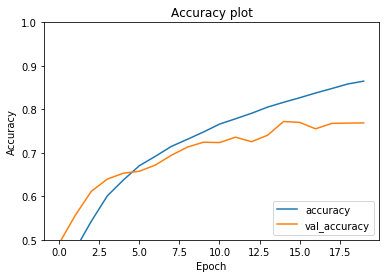

In [13]:
plt.plot(history.history['acc'], label='accuracy')
plt.plot(history.history['val_acc'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Accuracy plot')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')
plt.show()

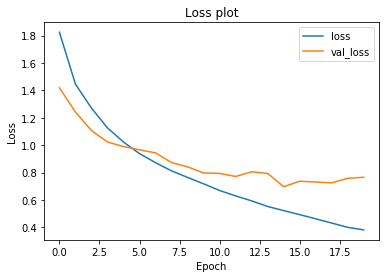

In [14]:
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label = 'val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Loss plot')
plt.legend(loc='upper right')
plt.show()

## Save weights

In [0]:
model.save(MODEL_PATH)